In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
x,  sr = librosa.load("audio/c_strum.wav")
ipd.Audio(x, rate=sr)

/var/folders/hv/hjk953ts2kl_rzsyst_tp9x00000gn/T/ipykernel_82987/3756960171.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(x, sr)


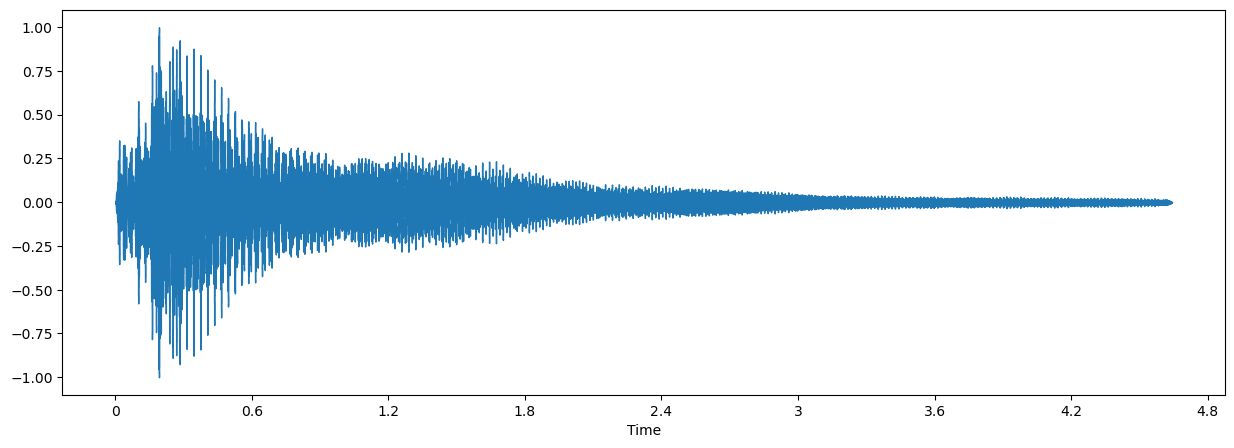

In [4]:
plt.figure(figsize=(15,5))
librosa.display.waveshow(x, sr)

In [5]:
r = np.correlate(x, x, mode="full")[len(x)-1:]
print(x.shape, r.shape)

(102400,) (102400,)


(0.0, 10000.0)

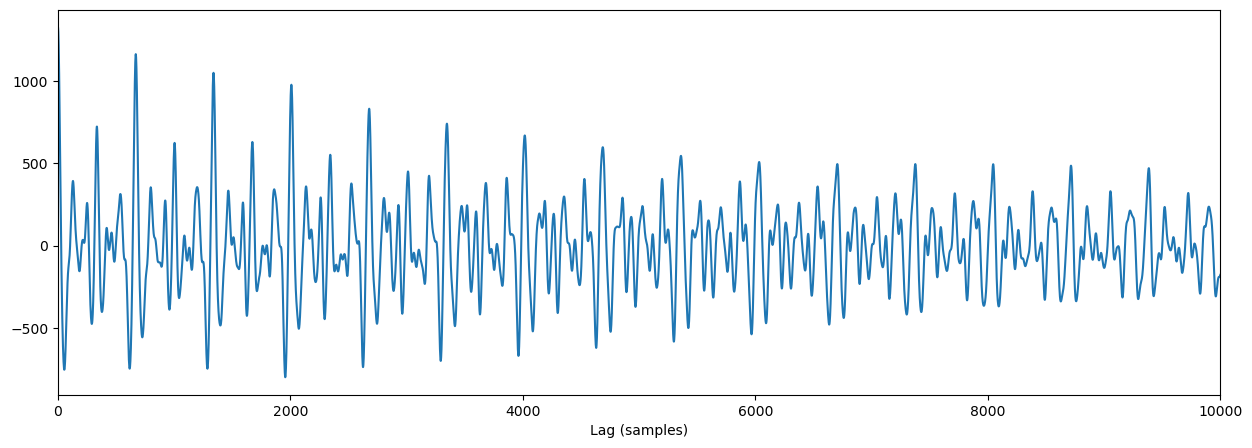

In [6]:
plt.figure(figsize=(15,5))
plt.plot(r[:10000])
plt.xlabel("Lag (samples)")
plt.xlim(0, 10000)

In [7]:
r = librosa.autocorrelate(x, max_size=10000)
print(r.shape)

(10000,)


(0.0, 10000.0)

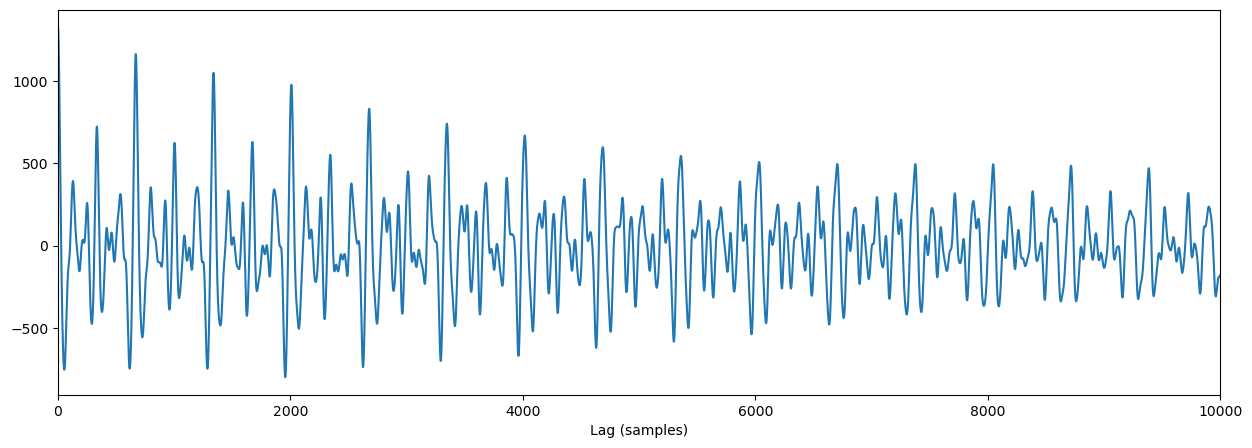

In [8]:
plt.figure(figsize=(15,5))
plt.plot(r)
plt.xlabel("Lag (samples)")
plt.xlim(0, 10000)


In [9]:
x, sr = librosa.load("audio/oboe_c6.wav")
ipd.Audio(x, rate=sr)

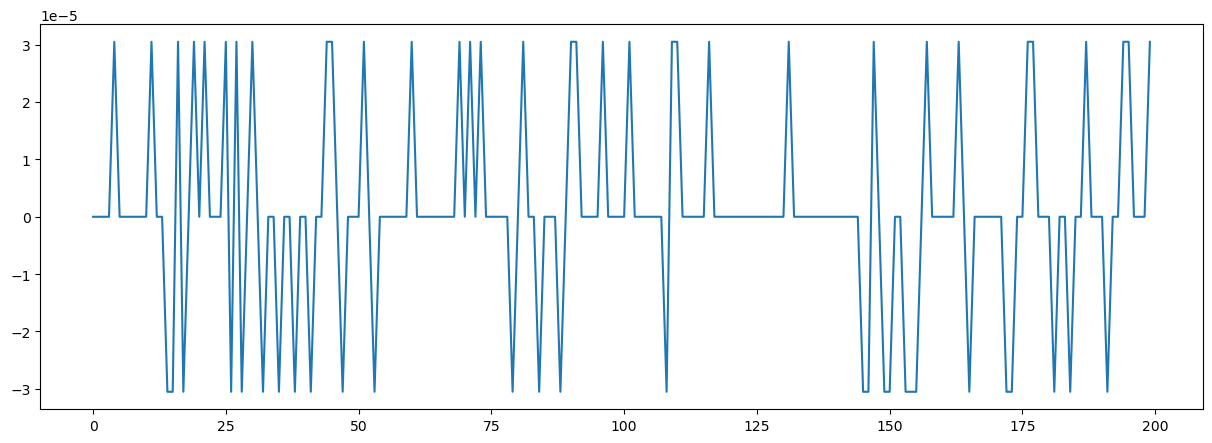

In [10]:
plt.figure(figsize=(15,5))
plt.plot(x[:200])

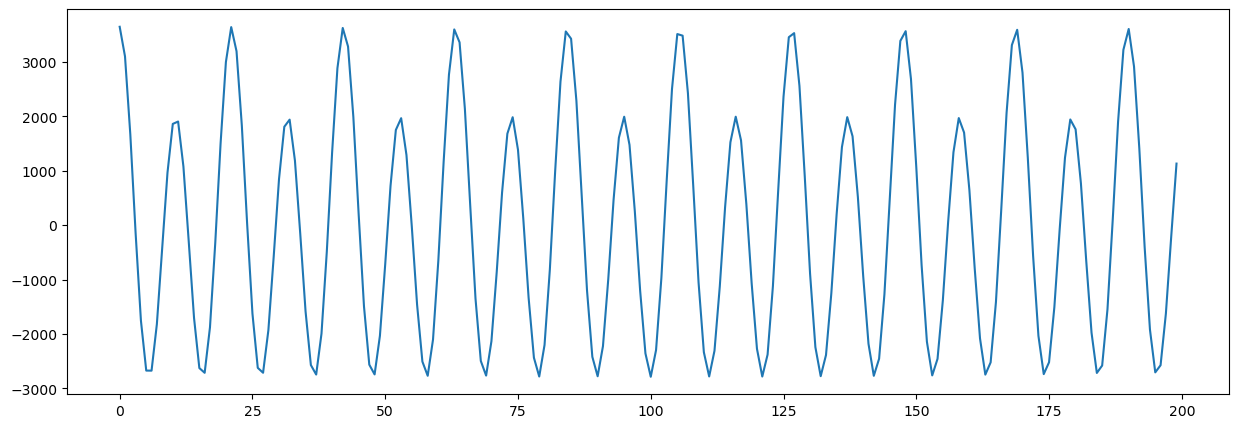

In [11]:
r = librosa.autocorrelate(x, max_size=5000)
plt.figure(figsize=(15,5))
plt.plot(r[:200])

In [12]:
print(librosa.midi_to_hz(120))

8372.018089619156


In [72]:
tone = librosa.tone(440, sr=48000, duration=1.0)

In [73]:
r = librosa.autocorrelate(tone)
i_min = sr/2000
i_max = sr/20
r[:int(i_min)] = 0
r[int(i_max):] = 0

i = r.argmax()
f0 = float(sr)/i

print(f0)

202.29357798165137


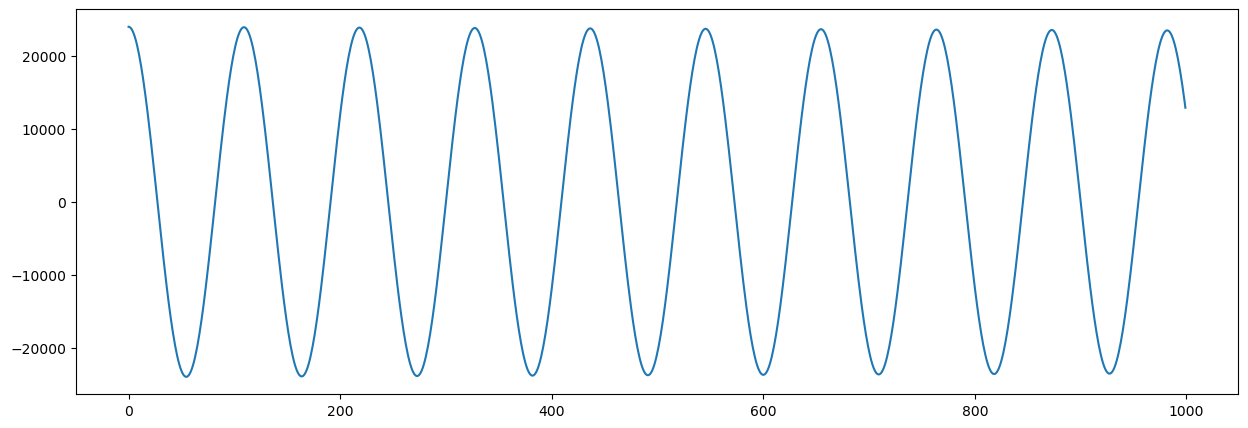

In [66]:
plt.figure(figsize=(15,5))
plt.plot(r[:1000])

In [78]:
f0 = 30
sr = 48000
T = 1.0

tone = librosa.tone(f0, sr, duration=T)
ipd.Audio(tone, rate=sr)

/var/folders/hv/hjk953ts2kl_rzsyst_tp9x00000gn/T/ipykernel_82987/86316843.py:5: FutureWarning: Pass sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tone = librosa.tone(f0, sr, duration=T)


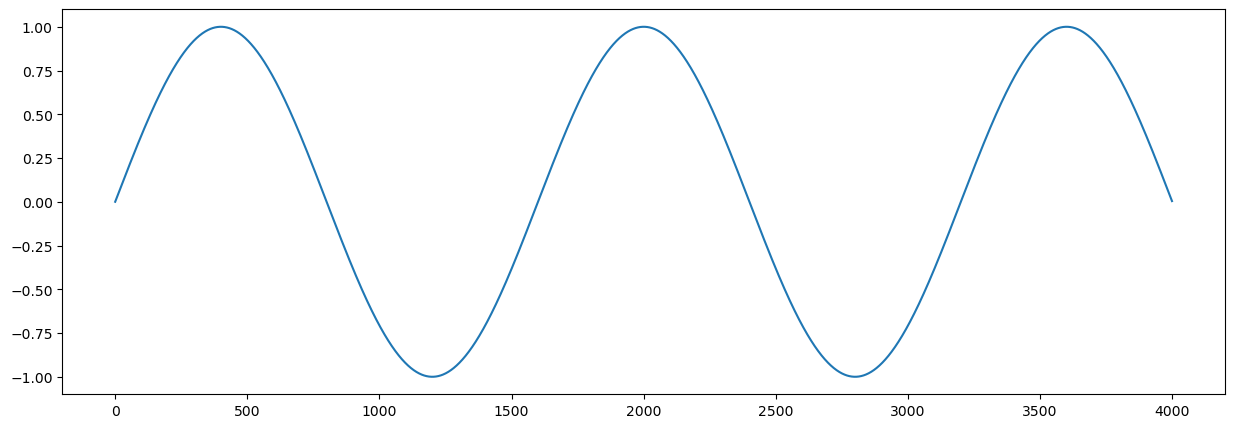

In [84]:
plt.figure(figsize=(15,5))
plt.plot(tone[:4000])

[0]
0


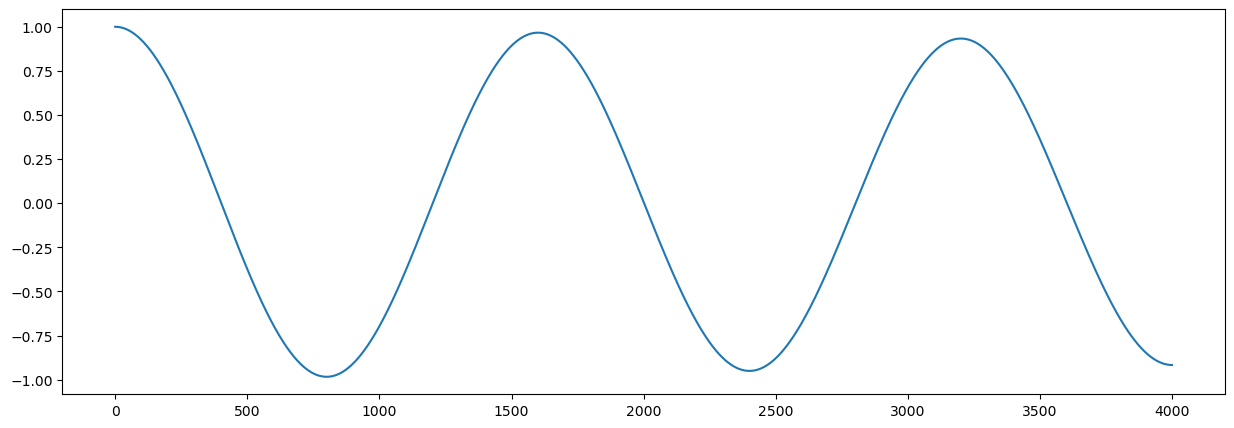

In [112]:
r = librosa.autocorrelate(tone)
r = r / max(r)

max_v = max(r)
index_list = []
for i in range(len(r)):
    if r[i] == max_v:
        index_list.append(i)

print(index_list)

print(np.argmax(r))

plt.figure(figsize=(15,5))
plt.plot(r[:4000])